# Préparation des données

In [37]:
import pandas as pd

df = pd.read_csv('./../test_rag/text_embeddings.csv')
df

,embedding,text
0,"[-0.0511474609375, 0.00971221923828125, 0.0586...",product_name wayona nylon braided usb lightnin...
1,"[-0.025787353515625, 0.0024566650390625, 0.029...",product_name ambrane unbreakable 60w 3a fast c...
2,"[-0.034698486328125, 0.033538818359375, 0.0403...",product_name sounce fast phone charging cable ...
3,"[-0.023162841796875, 0.00914764404296875, 0.03...",product_name boat deuce usb 300 2 1 typec micr...
4,"[-0.046478271484375, 0.0257110595703125, 0.028...",product_name portronics konnect l 12m fast cha...
...,...,...
1460,"[-0.0394287109375, 0.004497528076171875, 0.048...",product_name noir aqua 5pcs pp spun filter 1 s...
1461,"[-0.03570556640625, -0.002613067626953125, 0.0...",product_name prestige delight prwo electric ri...
1462,"[-0.0236053466796875, 0.0194091796875, 0.00481...",product_name bajaj majesty rx10 2000 watt heat...
1463,"[-0.0458984375, 0.0092926025390625, 0.03536987...",product_name havells ventil air dsp 230mm exha...


In [38]:
def str_to_list_float(s):
    return list(map(float, s[1:-1].split(',')))

Passe des str à des list de flotants

In [39]:
df["embedding"] = df["embedding"].apply(str_to_list_float)
print(type(df["embedding"][0]), type(df["embedding"][0][0]))

<class 'list'> <class 'float'>


# Algo de clustering

Méthode du coude

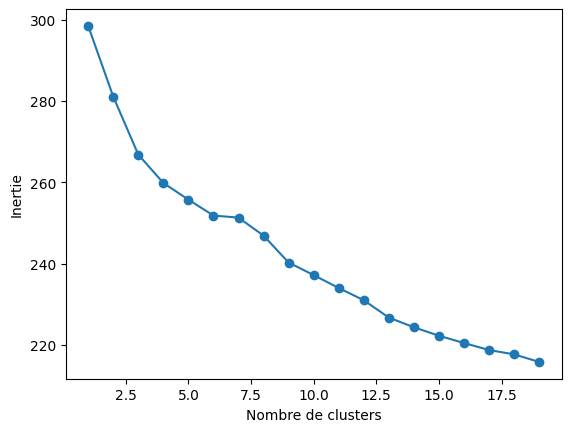

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df["embedding"].to_list())
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 20), inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

Méthode de silhouette

Score de silhouette pour 2 clusters : 0.06537852709011856
Score de silhouette pour 3 clusters : 0.0627887174062341
Score de silhouette pour 4 clusters : 0.07001456959028285
Score de silhouette pour 5 clusters : 0.06371655681651843
Score de silhouette pour 6 clusters : 0.06217241006109485
Score de silhouette pour 7 clusters : 0.04084901439907506
Score de silhouette pour 8 clusters : 0.04780971674549431
Score de silhouette pour 9 clusters : 0.05865528309870105
Score de silhouette pour 10 clusters : 0.05604056945920564
Score de silhouette pour 11 clusters : 0.05768248383083694
Score de silhouette pour 12 clusters : 0.06343073821298321
Score de silhouette pour 13 clusters : 0.06651356574105625
Score de silhouette pour 14 clusters : 0.06804145488865779
Score de silhouette pour 15 clusters : 0.06968149822532847
Score de silhouette pour 16 clusters : 0.07320759942753344
Score de silhouette pour 17 clusters : 0.07538280862045262
Score de silhouette pour 18 clusters : 0.07524492439755745
Score 

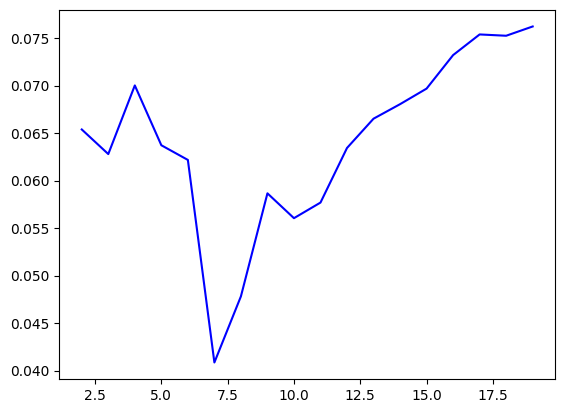

In [48]:
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df["embedding"].tolist())
    score = silhouette_score(df["embedding"].tolist(), labels)
    print(f"Score de silhouette pour {k} clusters : {score}")
    scores.append(score)

plt.plot([k for k in range(2,20)], scores, color='blue')
plt.show()

K-mean

In [64]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df["embedding"].tolist())

# Analyse des clusters

c:\Users\simon\Documents\VSC\Mistral_hackathon\quantum-black-hackathon\venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


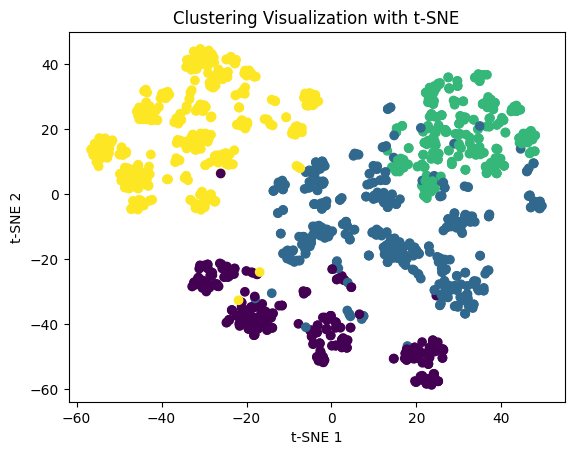

In [65]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Appliquer t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
reduced_data_tsne = tsne.fit_transform(np.array(df['embedding'].tolist()))

# Ajouter les composantes t-SNE au DataFrame
df['tsne1'] = reduced_data_tsne[:, 0]
df['tsne2'] = reduced_data_tsne[:, 1]

# Visualisation des clusters avec t-SNE
plt.scatter(df['tsne1'], df['tsne2'], c=df['cluster'], cmap='viridis')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Clustering Visualization with t-SNE')
plt.show()


c:\Users\simon\Documents\VSC\Mistral_hackathon\quantum-black-hackathon\venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


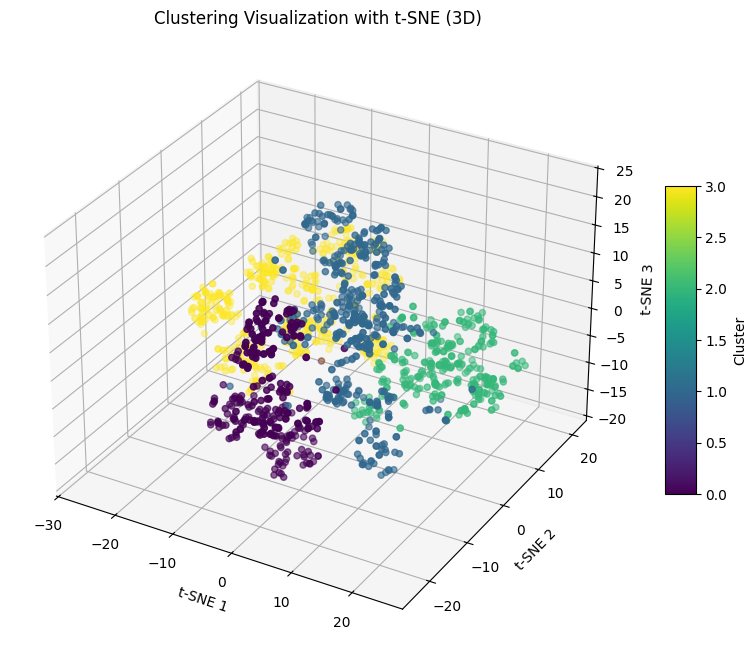

In [66]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import nécessaire pour la visualisation 3D
import numpy as np

# Appliquer t-SNE en 3D
tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
reduced_data_tsne = tsne.fit_transform(np.array(df["embedding"].tolist()))

# Ajouter les composantes t-SNE au DataFrame
df['tsne1'] = reduced_data_tsne[:, 0]
df['tsne2'] = reduced_data_tsne[:, 1]
df['tsne3'] = reduced_data_tsne[:, 2]

# Visualisation des clusters en 3D avec t-SNE
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['tsne1'], df['tsne2'], df['tsne3'], c=df['cluster'], cmap='viridis')

# Ajouter des labels et une légende
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
ax.set_title('Clustering Visualization with t-SNE (3D)')

# Ajouter une barre de couleurs pour représenter les clusters
legend = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
legend.set_label('Cluster')

plt.show()
